# Prediksi Rumah Jogja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv", sep=';')

### Inspecting and cleaning the data

In [3]:
# Printing the 1st 5 columns
data.head()

,Harga,Kecamatan,KT,KM,LT,LB,Lantai,Furnished,Carport
0,1500000000,1,3,2,98,85,2,0,0
1,1900000000,5,4,3,90,120,2,0,2
2,875000000,2,4,2,87,140,2,1,1
3,900000000,2,4,2,87,140,2,0,1
4,1200000000,2,4,2,80,100,2,0,0


In [4]:
# Printing the dimensions of data
data.shape

(731, 9)

In [5]:
# Viewing the column heading
data.columns

Index(['Harga', 'Kecamatan', 'KT', 'KM', 'LT', 'LB', 'Lantai', 'Furnished',
       'Carport'],
      dtype='object')

In [6]:
data.dtypes

Harga        int64
Kecamatan    int64
KT           int64
KM           int64
LT           int64
LB           int64
Lantai       int64
Furnished    int64
Carport      int64
dtype: object

In [7]:
# Identifying the unique number of values in the dataset
data.nunique()

Harga        128
Kecamatan     14
KT            31
KM            25
LT           304
LB           161
Lantai         3
Furnished      3
Carport        7
dtype: int64

In [8]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

Harga        0
Kecamatan    0
KT           0
KM           0
LT           0
LB           0
Lantai       0
Furnished    0
Carport      0
dtype: int64

In [9]:
# Viewing the data statistics
data.describe()

,Harga,Kecamatan,KT,KM,LT,LB,Lantai,Furnished,Carport
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4.081795e+09,4.103967,6.043776,4.257182,351.038304,280.595075,1.597811,0.487004,0.261286
std,4.701122e+09,3.112084,5.315859,4.185043,335.317570,215.844719,0.528317,0.778677,0.799910
min,3.500000e+08,0.000000,1.000000,1.000000,40.000000,40.000000,1.000000,0.000000,0.000000
25%,1.400000e+09,2.000000,3.000000,2.000000,136.500000,140.000000,1.000000,0.000000,0.000000
50%,2.500000e+09,3.000000,4.000000,3.000000,240.000000,220.000000,2.000000,0.000000,0.000000
75%,4.800000e+09,7.000000,6.000000,5.000000,442.000000,350.000000,2.000000,1.000000,0.000000
max,3.700000e+10,13.000000,64.000000,64.000000,2852.000000,2000.000000,3.000000,2.000000,13.000000


### Data Visualization

### Jumlah Rumah di Jual berdasarkan Kecamatan

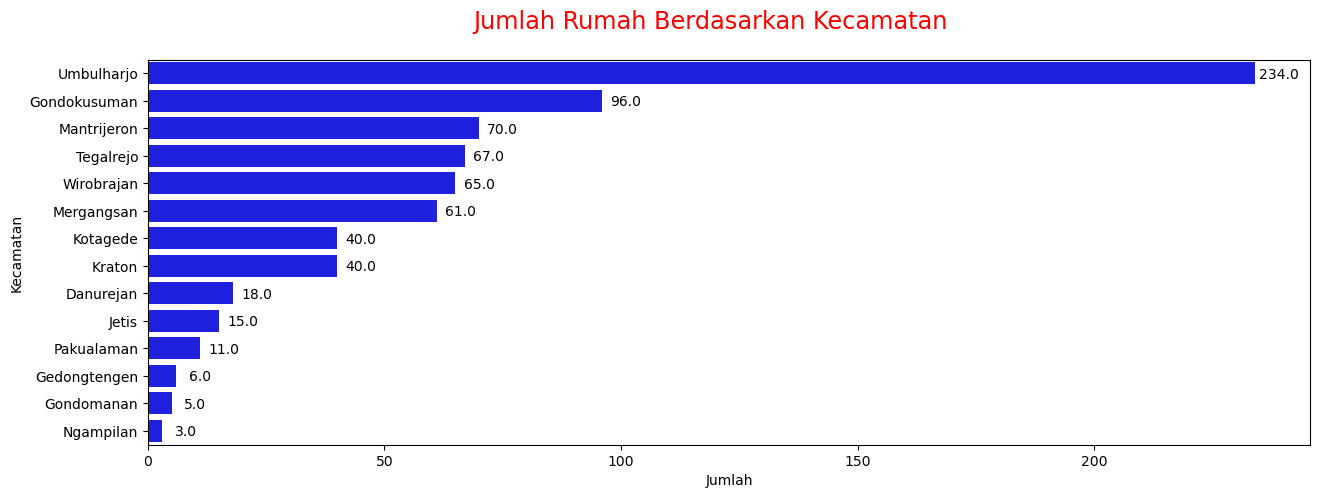

In [10]:
result = data.groupby(['Kecamatan']).size().sort_values(ascending=False)
labels = ["Umbulharjo","Gondokusuman","Mantrijeron","Tegalrejo","Wirobrajan","Mergangsan",
          "Kotagede","Kraton","Danurejan","Jetis","Pakualaman","Gedongtengen","Gondomanan","Ngampilan"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah Berdasarkan Kecamatan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values, color = 'blue') 

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Jumlah')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             format(width),
             ha='center', va='center')
    
plt.show() 

### Rata2 Harga berdasarkan Kecamatan

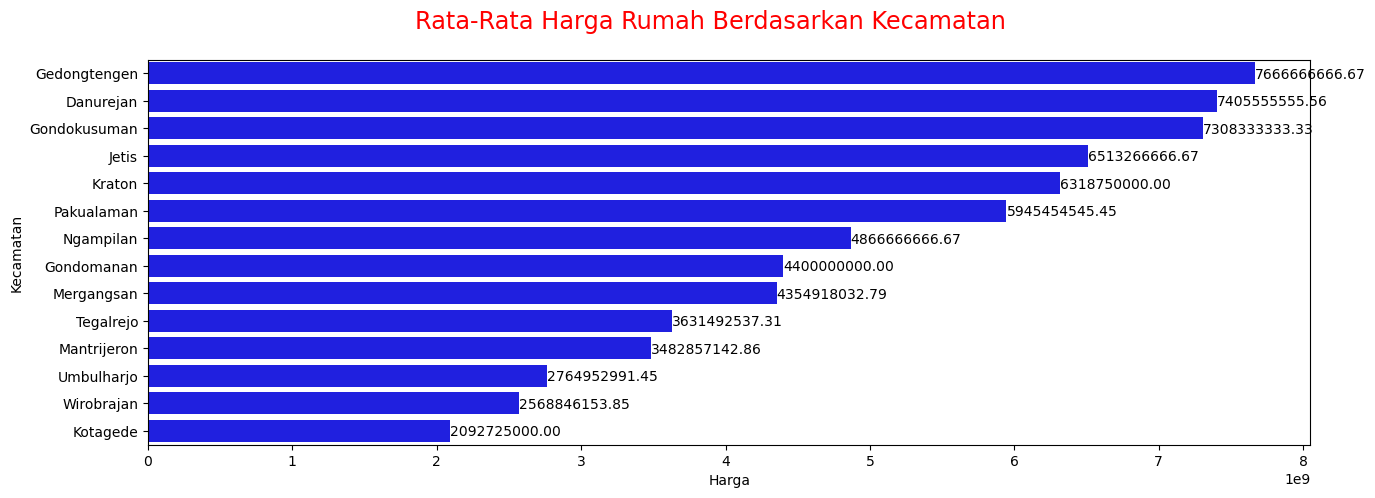

In [11]:
result = data.groupby(['Kecamatan'])['Harga'].mean().sort_values(ascending=False)
labels = ["Gedongtengen","Danurejan","Gondokusuman","Jetis","Kraton","Pakualaman",
          "Ngampilan","Gondomanan","Mergangsan","Tegalrejo","Mantrijeron","Umbulharjo","Wirobrajan","Kotagede"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-Rata Harga Rumah Berdasarkan Kecamatan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values, color='blue')

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Harga')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
plt.show()

### Rata2 Luas Tanah berdasarkan Kecamatan

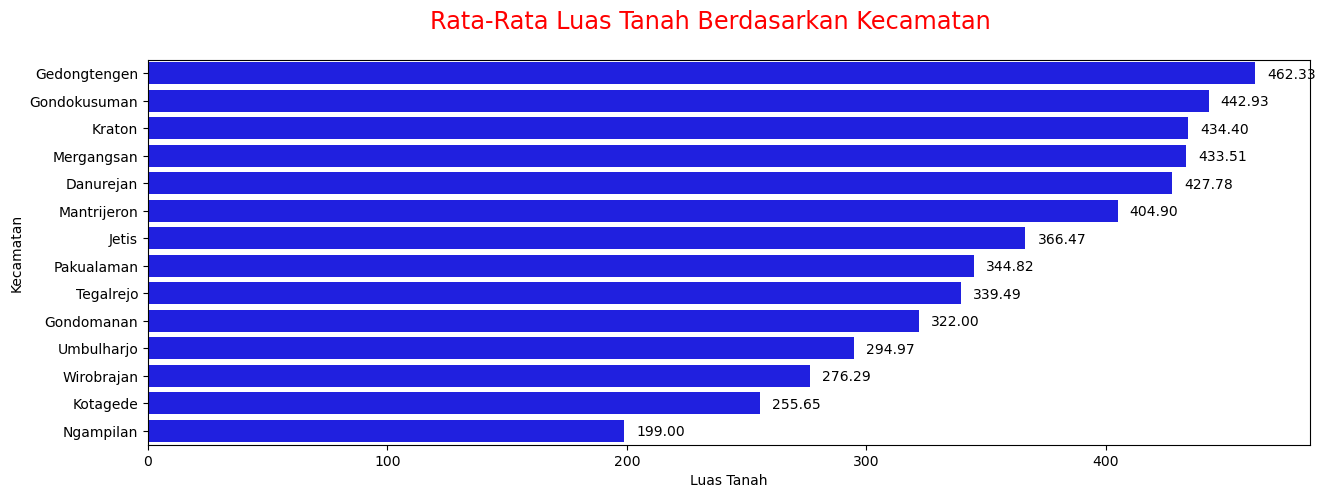

In [12]:
result = data.groupby(['Kecamatan'])['LT'].mean().sort_values(ascending=False)
labels = ["Gedongtengen","Gondokusuman","Kraton","Mergangsan","Danurejan","Mantrijeron",
          "Jetis","Pakualaman","Tegalrejo","Gondomanan","Umbulharjo","Wirobrajan","Kotagede","Ngampilan"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-Rata Luas Tanah Berdasarkan Kecamatan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values, color = "blue")

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Luas Tanah')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
plt.show()

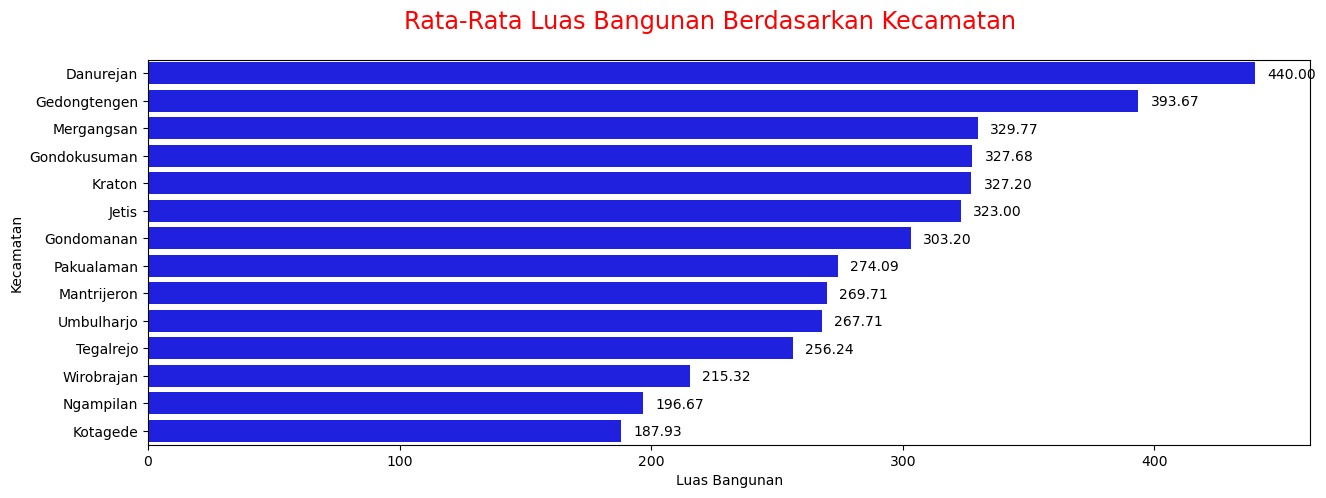

In [13]:
#### LUAS BANGUNAN

result = data.groupby(['Kecamatan'])['LB'].mean().sort_values(ascending=False)
labels = ["Danurejan","Gedongtengen","Mergangsan","Gondokusuman","Kraton","Jetis",
          "Gondomanan","Pakualaman","Mantrijeron","Umbulharjo","Tegalrejo","Wirobrajan","Ngampilan","Kotagede"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-Rata Luas Bangunan Berdasarkan Kecamatan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values, color = "blue")

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Luas Bangunan')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='left', va='center')
    
plt.show()

### Jumlah Rumah berdasarkan Lantai

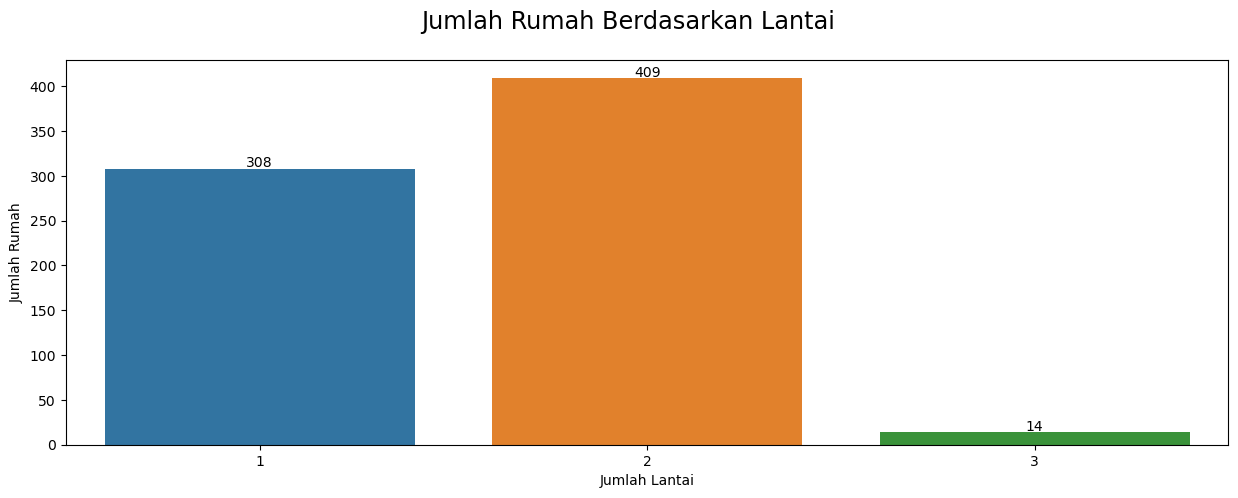

In [14]:
#Jumlah lantai
result = data.groupby(['Lantai']).size()


fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah Berdasarkan Lantai', fontsize = 'xx-large')

ax = sns.barplot(y = result.values, x = result.index) 

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')
ax.set_ylabel('Jumlah Rumah')
ax.set_xlabel('Jumlah Lantai')

plt.show() 

### Jumlah Rumah berdasarkan Fasilitas

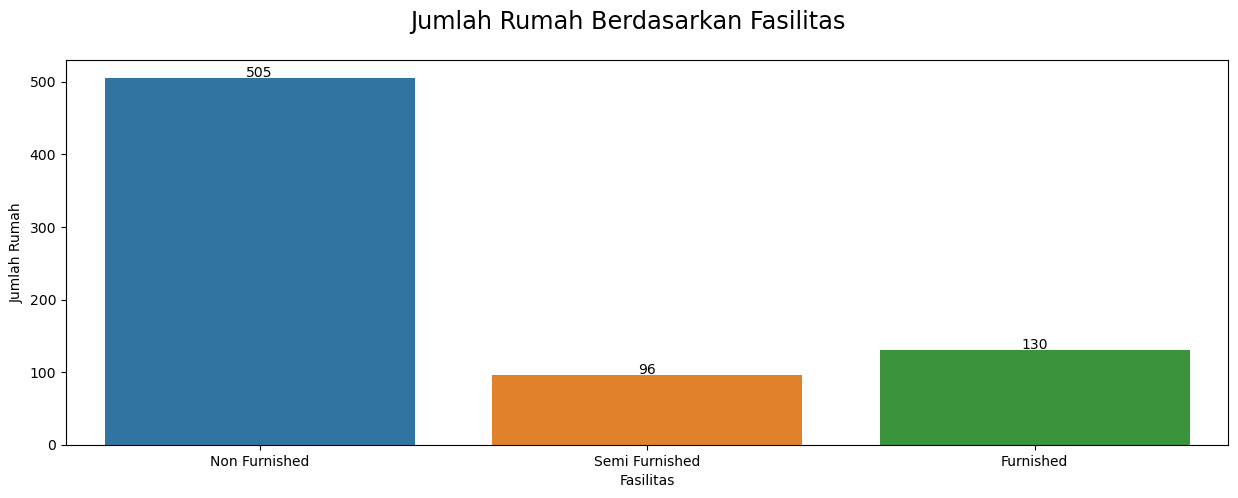

In [15]:
#Fasilitas
result = data.groupby(['Furnished']).size()
Label = ["Non Furnished","Semi Furnished","Furnished"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah Berdasarkan Fasilitas', fontsize = 'xx-large')

ax = sns.barplot(y = result.values, x = Label) 

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')
ax.set_ylabel('Jumlah Rumah')
ax.set_xlabel('Fasilitas')

plt.show() 

### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [16]:
# Spliting target variable and independent variables
X = data.drop(['Harga'], axis = 1)
y = data['Harga']

In [17]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (584, 8)
Size of test set: (147, 8)


# Tuning Random Forest

In [81]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [82]:
# Jumlah Pohon 12
rfr = RandomForestRegressor(n_estimators=12, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,619,965,702.22
R2 : 0.7482016387894624
MAPE : 25.68%
Accuracy : 74.32%


In [83]:
# Jumlah Pohon 22
rfr = RandomForestRegressor(n_estimators=22, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,408,144,655.52
R2 : 0.7872709359028723
MAPE : 25.39%
Accuracy : 74.61%


In [84]:
# Jumlah Pohon 100
rfr = RandomForestRegressor(n_estimators=100, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,509,889,300.50
R2 : 0.768915497113288
MAPE : 27.32%
Accuracy : 72.68%


In [85]:
# Jumlah Pohon 200
rfr = RandomForestRegressor(n_estimators=200, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,522,567,827.14
R2 : 0.766574986803205
MAPE : 28.24%
Accuracy : 71.76%


In [86]:
# Jumlah Pohon 300
rfr = RandomForestRegressor(n_estimators=300, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,507,963,990.72
R2 : 0.7692698861365831
MAPE : 28.1%
Accuracy : 71.9%


## HYPERPARAMETER TUNING

In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [12,22,100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [12, 22, 100, 200, 300], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, cv = 5, verbose=3, n_jobs=-1,
                              return_train_score=True,random_state=0)

In [89]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [12, 22, 100, 200,
                                                         300]},
                   random_state=0, return_train_score=True, verbose=3)

In [90]:
rf_random.best_params_

{'n_estimators': 22,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
randmf = RandomForestRegressor(n_estimators = 22, min_samples_split = 10, min_samples_leaf= 2,max_features= 'auto',max_depth= 20,random_state=0) 
randmf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=22, random_state=0)

In [92]:
y_pred = randmf.predict(X_test)
new_rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'MAPE : {round(mean_absolute_percentage_error(y_test,y_pred)*100,2)}%')
print(f'Accuracy : {100-(round(mean_absolute_percentage_error(y_test,y_pred)*100,2))}%')

RMSE : 2,613,943,565.90
R2 : 0.7493578534172278
MAPE : 27.78%
Accuracy : 72.22%


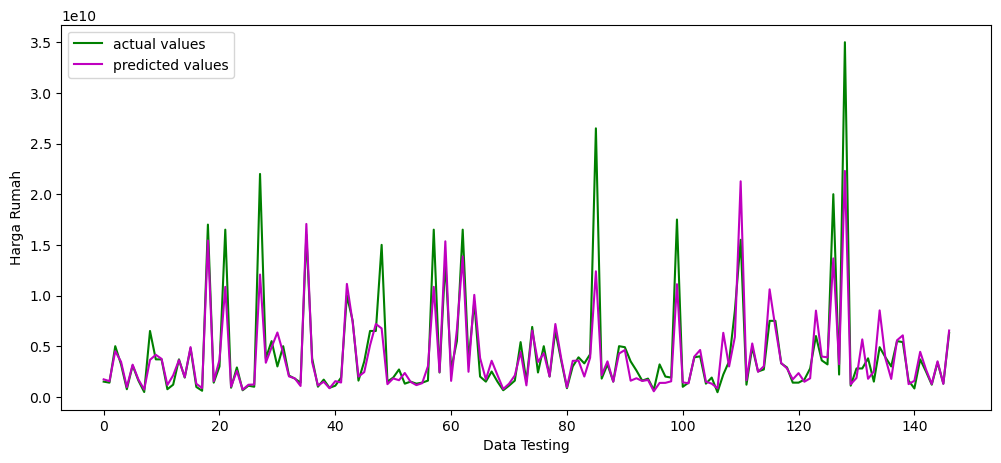

In [93]:
rfr = RandomForestRegressor(n_estimators=22, max_features="log2", random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# figure size
plt.figure(figsize=(12, 5))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred, c='m',label="predicted values")
plt.legend()

plt.ylabel('Harga Rumah')
plt.xlabel('Data Testing')
plt.show()

In [94]:
importances = list(rfr.feature_importances_)

predictors_list = list(X)

feature_importances = [(X, round(importance, 3)) for X, importance in zip(predictors_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)

[print('Variabel: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variabel: LT                   Importance: 0.471
Variabel: LB                   Importance: 0.214
Variabel: KT                   Importance: 0.105
Variabel: Kecamatan            Importance: 0.083
Variabel: KM                   Importance: 0.083
Variabel: Lantai               Importance: 0.017
Variabel: Furnished            Importance: 0.015
Variabel: Carport              Importance: 0.012


[None, None, None, None, None, None, None, None]

In [95]:
y_test.describe()

count    1.470000e+02
mean     4.354014e+09
std      5.239036e+09
min      4.550000e+08
25%      1.500000e+09
50%      2.800000e+09
75%      4.900000e+09
max      3.500000e+10
Name: Harga, dtype: float64

In [96]:
#save the model

import pickle
filename = 'bestmodel.sav'
pickle.dump(rfr, open(filename,'wb'))

In [97]:
load_model = pickle.load(open(filename, 'rb'))